___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: XGBoost - Regresión</font>

Los datos los podemos obtener de: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

Columnas disponibles:
- AT: Atmospheric Temperature in C
- V: Exhaust Vacuum Speed
- AP: Atmospheric Pressure
- RH: Relative Humidity
- PE: Power Output

Power output (energía) es la variable a predecir

In [1]:
#Librerías
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargar datos
datos = pd.read_excel("Folds5x2_pp.xlsx")

In [3]:
datos.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
datos.shape

(9568, 5)

In [5]:
datos.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

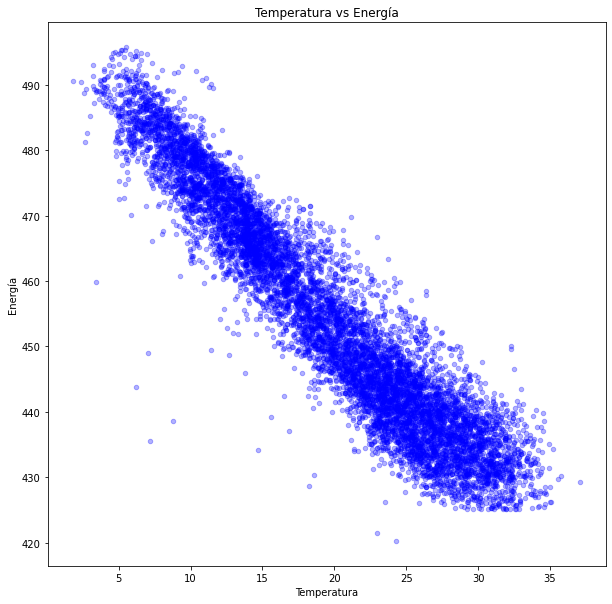

In [6]:
# Relación entre variable de salida y la temperatura
datos.plot(x ='AT', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Temperatura vs Energía")
plt.xlabel("Temperatura") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación ** entre la temperatura y la energía

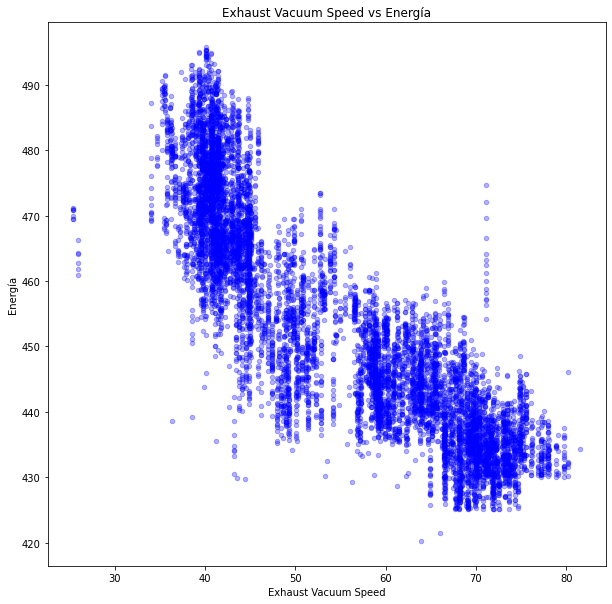

In [7]:
# Relación entre variable de salida y el Exhaust Vacuum Speed
datos.plot(x ='V', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Exhaust Vacuum Speed vs Energía")
plt.xlabel("Exhaust Vacuum Speed") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación ** entre la temperatura y el Exhaust Vacuum Speed

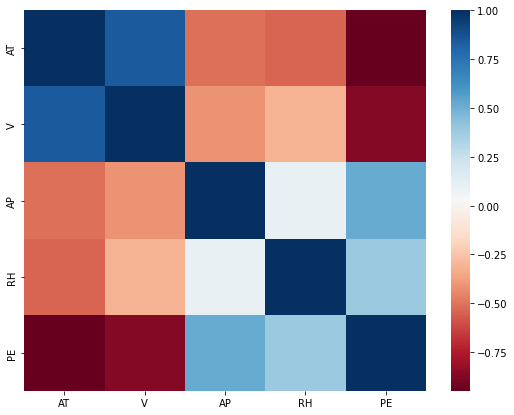

In [8]:
# gráfico de correlacion
corr = datos.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [9]:
#Separar nuestras X de las Y
X = datos.drop("PE", axis = 1).values
y = datos['PE'].values
y = y.reshape(-1, 1)

#Dividiendo los datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)



In [10]:
#Construir el xgboost
#inicializar objeto de regresión
modelo = xgb.XGBRegressor(objective = 'reg:linear', seed = 42)
#Entrenar modelo
modelo.fit(X_train, y_train)

[18:03:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [11]:
import sklearn.metrics as metrics
y_hat= modelo.predict(X_test)
#performance
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.9680627099831424
MSE: 9.263665826132463


Ahora optimizamos parámetros con grid search y utilizamos cross validation

In [12]:
#Parámetros para el grid search
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5), #porcentaje de vraibles a elegir
     'n_estimators':[100, 200], #número de árboles a crear
     'max_depth': [10, 15, 20, 25] #profundidades
}
#Iniciar el modelo
gbm = xgb.XGBRegressor(objective='reg:linear',seed=42)

#Hacer el grid search
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
#Ajustar a los datos de entrenamiento
grid_mse.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados: ",grid_mse.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[18:03:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:17] WAR

[18:04:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

[18:04:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

[18:05:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

[18:06:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

[18:06:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [14]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo_nuevo = xgb.XGBRegressor(objective='reg:linear',
                            seed=42,
                           max_depth=10,
                           colsample_bytree=0.8,
                            n_estimators=200)

modelo_nuevo.fit(X_train, y_train)

[18:08:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [15]:
y_hat= modelo_nuevo.predict(X_test)
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.969865544207637
MSE: 8.740739372860501
